# Частина третя: Аналіз датасет c Kaggle.com

**Прочитайте csv файл (використовуйте функцію read_csv)**

In [75]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
book_data = pd.read_csv('bestsellers with categories.csv')

**Виведіть перші п'ять рядків (використовується функція head)**

In [4]:
book_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


**Виведіть розміри датасету (використовуйте атрибут shape)**

In [5]:
сount_rows = book_data.shape[0]
count_columns = book_data.shape[1]

print("Number of rows:", сount_rows)
print("Number of columns:", count_columns)

Number of rows: 550
Number of columns: 7


**Відповідь: Про скільки книг зберігає дані датасет? - <font color='red'> 351 </font>**

In [6]:
book_data['Name'].unique()
unique_sum = len(book_data['Name'].unique())
print(unique_sum)

351


In [76]:
book_data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
book_data.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


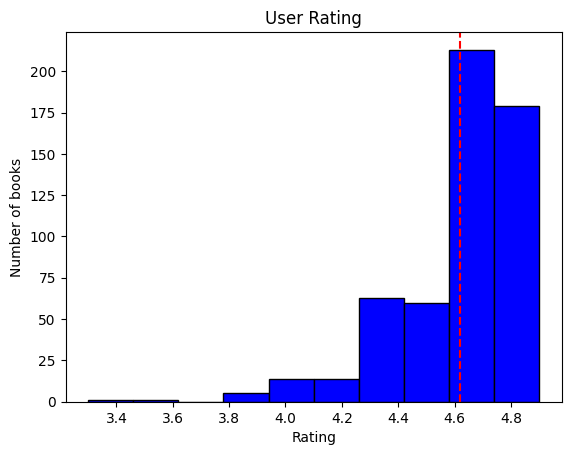

In [89]:
book_data['user_rating'].plot(kind='hist', bins=10, edgecolor='black', color='blue')
plt.axvline(book_data['user_rating'].mean(), color='red', linestyle='--', label='Mean Rating')
plt.title('User Rating')
plt.xlabel('Rating')
plt.ylabel('Number of books')
plt.show()

## Первинне дослідження даних

**Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)**

In [8]:
empty_count = book_data.isna().sum()
print(empty_count)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


**Відповідь: Чи є в якихось змінних пропуски? <font color='red'> ні </font>**

<hr>

**Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)**

In [9]:
unique_ganre = book_data['genre'].unique()
print(unique_ganre)

['Non Fiction' 'Fiction']


**Відповідь: Які є унікальні жанри?<font color='red'> Non Fiction,  Fiction</font>**

<hr>

**Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')**

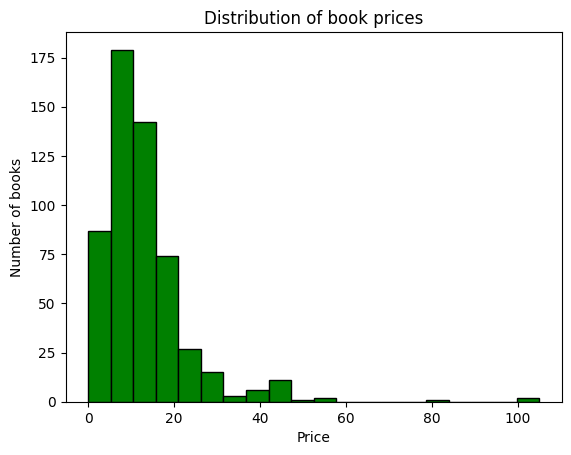

In [10]:
book_data['price'].plot(kind='hist', bins=20, edgecolor='black', color='green')
plt.title('Distribution of book prices')
plt.xlabel('Price')
plt.ylabel('Number of books')
plt.show()

**Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)**

In [11]:
max_price = book_data['price'].max()
min_price = book_data['price'].min()
mean_price = book_data['price'].mean()
median_price = book_data['price'].median()

print("max price:", max_price)
print("min price:", min_price)
print("mean price:", mean_price)
print("median price:", median_price)

max price: 105
min price: 0
mean price: 13.1
median price: 11.0


## Пошук та сортування даних

**Відповідь: Який рейтинг у датасеті найвищий? Відповідь: <font color='red'>4.9</font>**

In [12]:
max_user_rating = book_data['user_rating'].max()
print(max_user_rating)

4.9


<hr>

**Відповідь: Скільки книг мають такий рейтинг? Відповідь: <font color='red'>52</font>**

In [13]:
books_with_max_rating = book_data[book_data['user_rating'] == max_user_rating]
num_books_with_max_rating = len(books_with_max_rating)
print(num_books_with_max_rating)

52


**Відповідь: Яка книга має найбільше відгуків? Відповідь: <font color='red'>Where the Crawdads Sing </font>**

In [14]:
max_reviews = book_data['reviews'].max()
book_with_max_reviews = book_data[book_data['reviews']==max_reviews]

print(max_reviews)
book_with_max_reviews

87841


,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


<hr>

**Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:<font color='red'> 46 </font>**

In [90]:
#Перевіряємо, що у 2015 саме 50 книг
books_in_2015 = book_data[book_data['year']==2015]
num_books_in_2015 = len(books_in_2015)
print(f"Number of books in 2015: {num_books_in_2015}")

top_books_2015 = book_data[(book_data['year']==2015)]
expensive_book = top_books_2015 [top_books_2015 ['price']==top_books_2015 ['price'].max()]

print("The most expensive book among those in the Top 50 in 2015:")
expensive_book[['name', 'price']]

Number of books in 2015: 50
The most expensive book among those in the Top 50 in 2015:


,name,price
277,Publication Manual of the American Psychologic...,46


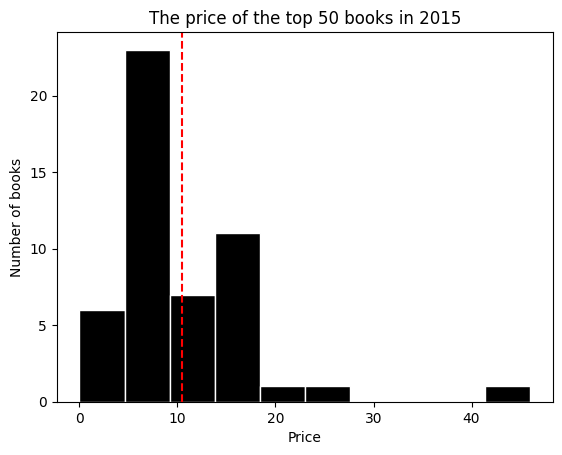

In [96]:
books_in_2015['price'].plot(kind='hist', bins=10, edgecolor='white', color='black')
plt.axvline(books_in_2015['price'].mean(), color='red', linestyle='--', label='Mean Rating')
plt.title('The price of the top 50 books in 2015')
plt.xlabel('Price')
plt.ylabel('Number of books')
plt.show()

<hr>

**Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: <font color='red'>20</font>**

In [79]:
#Перевіряємо, що у 2010 саме 50 книг
books_in_2010 = book_data[book_data['year']==2010]
num_books_in_2010 = len(books_in_2010)
print(f"Number of books in 2010: {num_books_in_2010}")

books_2010_genre_fiction = book_data[((book_data['year']==2010)&(book_data['genre']=='Fiction'))]
sum_books = len(books_2010_genre_fiction)

print("The number of books in the Fiction genre that made it to the Top 50 in 2010:", sum_books)

Number of books in 2010: 50
The number of books in the Fiction genre that made it to the Top 50 in 2010: 20


<hr>

**Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:<font color='red'> 1 </font>**

In [16]:

books_2010_2011 = book_data[(book_data['year'].isin([2010, 2011]))&(book_data['user_rating'] == 4.9)]
count_books_2010_2011 = len(books_2010_2011)
count_books_2010_2011

1

**І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).**

In [21]:
books_2015 = book_data[(book_data['year']==2015)&(book_data['price']<8)]
sort_books_2015 = books_2015.sort_values(by='price')
sort_books_2015
#sort_books_2015.iloc[-1]

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


**Відповідь: Яка книга остання у відсортованому списку? Відповідь:<font color='red'> Old School (Diary of a Wimpy Kid #10)</font>**

## Агрегування даних та з'єднання таблиць

**Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам**

In [32]:
genre_agg = book_data.groupby('genre')['price'].agg(['min','max'])
genre_agg 

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


**Відповідь: Максимальна ціна для жанру Fiction: 82**

**Відповідь: Мінімальна ціна для жанру Fiction: 0**

**Відповідь: Максимальна ціна для жанру Non Fiction: 105**

**Відповідь: Мінімальна ціна для жанру Non Fiction: 0**

**Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні**

In [56]:
authors_books= book_data.groupby('author').agg(books_count=('name', 'count'))
authors_books.head()

,books_count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1


**Відповідь: Якої розмірності вийшла таблиця? Відповідь: 248, 1**

In [57]:
authors_books.shape

(248, 1)

**Відповідь: Який автор має найбільше книг? Відповідь: <font color='red'> Jeff Kinney </font>**

In [62]:
max_value = authors_books['books_count'].max()
author_with_max_books = authors_books[authors_books['books_count'] == max_value]
author_with_max_books

,books_count
author,
Jeff Kinney,12


**Відповідь: Скільки книг цього автора? Відповідь: <font color='red'>12</font>**

**Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні**

In [64]:
mean_rating = book_data.groupby('author').agg(mean_rating=('user_rating','mean'))
mean_rating

,mean_rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


**Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: <font color='red'>Donna Tartt</font>**

In [68]:
min_rating = mean_rating['mean_rating'].min()
author_with_min_rating = mean_rating[mean_rating['mean_rating']==min_rating]
author_with_min_rating

,mean_rating
author,
Donna Tartt,3.9


**Відповідь: Який у цього автора середній рейтинг? Відповідь: <font color='red'>3.9</font>**

**З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну**

In [73]:
result_data = pd.concat([authors_books, mean_rating], axis=1)
result_data

,books_count,mean_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


**Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)**

In [74]:
result_data_sorted = result_data.sort_values(by=['books_count', 'mean_rating'], ascending=[True, True])
result_data_sorted

,books_count,mean_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


**Відповідь: Який автор перший у списку? <font color="red">Muriel Barbery</font>**